A support vector machine (SVM) is defined as a machine learning algorithm that uses supervised learning models to solve complex.    

1- classification.      
2- Regression.     
3- outlier detection.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [18]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [20]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
90,5.5,2.6,4.4,1.2,1,versicolor
94,5.6,2.7,4.2,1.3,1,versicolor
91,6.1,3.0,4.6,1.4,1,versicolor
124,6.7,3.3,5.7,2.1,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica


In [64]:
df['flower_name'].value_counts()

flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [21]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

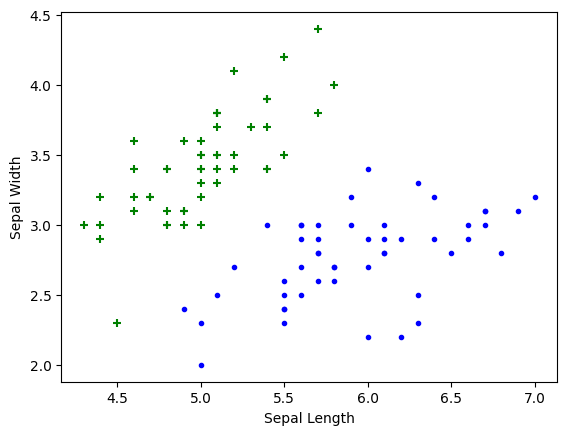

In [25]:
# Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


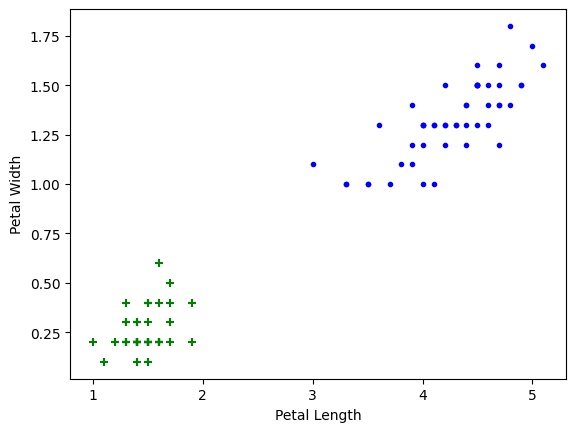

In [26]:
# Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [57]:
# Train Using Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [46]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
135,7.7,3.0,6.1,2.3
9,4.9,3.1,1.5,0.1
20,5.4,3.4,1.7,0.2
73,6.1,2.8,4.7,1.2
...,...,...,...,...
117,7.7,3.8,6.7,2.2
66,5.6,3.0,4.5,1.5
88,5.6,3.0,4.1,1.3
72,6.3,2.5,4.9,1.5


In [47]:
len(X_train)

120

In [48]:
len(X_test)

30

In [49]:
from sklearn.svm import SVC
model = SVC()

In [50]:
model.fit(X_train, y_train)

SVC()

In [51]:
y_test

104    2
25     0
146    2
110    2
29     0
97     1
6      0
79     1
143    2
22     0
62     1
114    2
98     1
87     1
53     1
123    2
94     1
111    2
49     0
57     1
129    2
140    2
7      0
93     1
148    2
8      0
138    2
92     1
0      0
26     0
Name: target, dtype: int32

In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred

array([2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2,
       0, 1, 2, 0, 1, 1, 0, 0])

In [54]:
model.score(X_test, y_test)

0.9333333333333333

In [55]:
model.predict([[4.8,3.0,1.5,0.3]])

c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [58]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



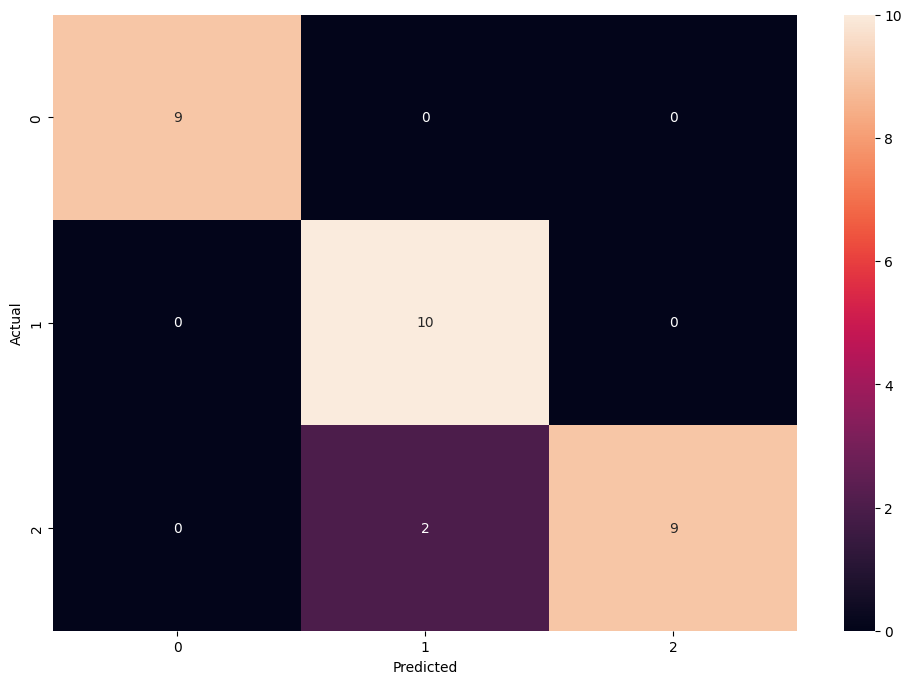

In [62]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Tune parameters

1. Regularization (C)


In [68]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [69]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

2. Gamma



In [70]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8666666666666667

3. Kernel

In [71]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [72]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667